## Imdb Cleaned Dataset Train Test split

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from scipy import stats


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/zlatte1/ds22_project/main/data.csv') 

In [3]:
df.head(3)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Country_of_origin,top_50_director_1,...,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western,Budget_inf,Income_inf,Profit_inf,ROI_inf
0,Avatar: The Way of Water,7.8,2022,12,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",United States,1,...,0,0,0,0,0,0,350000000.0,2.267947e+09,1.917947e+09,0.845675
1,Guillermo del Toro's Pinocchio,7.6,2022,12,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","United States, Mexico, France",1,...,0,0,0,0,0,0,35000000.0,1.089670e+05,-3.489103e+07,-320.198161
2,Bullet Train,7.3,2022,8,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Japan, United States",0,...,0,0,0,1,0,0,85900000.0,2.392686e+08,1.533686e+08,0.640989


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1869 non-null   object 
 1   Rating             1869 non-null   float64
 2   Year               1869 non-null   int64  
 3   Month              1869 non-null   int64  
 4   Certificate        1849 non-null   object 
 5   Runtime            1869 non-null   float64
 6   Directors          1869 non-null   object 
 7   Stars              1869 non-null   object 
 8   Country_of_origin  1869 non-null   object 
 9   top_50_director_1  1869 non-null   int64  
 10  top_50_director_2  1869 non-null   int64  
 11  top_1000_Stars_1   1869 non-null   int64  
 12  top_1000_Stars_2   1869 non-null   int64  
 13  top_1000_Stars_3   1869 non-null   int64  
 14  top_1000_Stars_4   1869 non-null   int64  
 15  genre_Action       1869 non-null   int64  
 16  genre_Adventure    1869 

In [5]:
df.describe()

,Rating,Year,Month,Runtime,top_50_director_1,top_50_director_2,top_1000_Stars_1,top_1000_Stars_2,top_1000_Stars_3,top_1000_Stars_4,...,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western,Budget_inf,Income_inf,Profit_inf,ROI_inf
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,...,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1.869000e+03,1.869000e+03,1.869000e+03,1869.000000
mean,6.702782,2012.096308,7.097378,113.916533,0.100054,0.003745,0.674157,0.532905,0.434457,0.307116,...,0.136437,0.111289,0.016586,0.177100,0.011236,0.004815,6.799913e+07,2.288896e+08,1.595790e+08,-1.784009
std,0.895416,5.635078,3.548553,19.529243,0.300152,0.061101,0.468814,0.499050,0.495818,0.461421,...,0.343343,0.314574,0.127750,0.381856,0.105431,0.069244,7.301177e+07,3.277384e+08,2.777834e+08,37.786839
min,1.900000,2003.000000,1.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.995460e+08,-1134.412084
25%,6.200000,2007.000000,4.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.258553e+07,2.943337e+07,0.000000e+00,0.000000
50%,6.800000,2012.000000,7.000000,111.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.181983e+07,1.129166e+08,5.900652e+07,0.594766
75%,7.300000,2017.000000,10.000000,125.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010434e+08,2.751781e+08,1.881962e+08,0.770157
max,9.000000,2022.000000,12.000000,242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.032452e+08,3.678646e+09,3.380369e+09,0.992836


In [6]:
df.shape

(1869, 39)

In [7]:
df.corr()

,Rating,Year,Month,Runtime,top_50_director_1,top_50_director_2,top_1000_Stars_1,top_1000_Stars_2,top_1000_Stars_3,top_1000_Stars_4,...,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western,Budget_inf,Income_inf,Profit_inf,ROI_inf
Rating,1.000000,0.024932,0.068216,0.366359,0.222051,-0.000191,0.050621,0.097192,0.097840,0.083187,...,-0.054170,-0.036450,0.033760,-0.026023,0.064881,0.024822,0.018136,0.181485,0.207435,-0.000658
Year,0.024932,1.000000,0.099736,0.151622,-0.022475,-0.055467,-0.155697,-0.136855,-0.120365,-0.065941,...,-0.111107,0.022036,-0.086251,0.035855,0.038726,0.005671,-0.078327,-0.029896,-0.012389,-0.087933
Month,0.068216,0.099736,1.000000,0.083429,0.053171,-0.006621,-0.000868,0.005445,0.015496,0.016055,...,-0.035077,-0.053834,-0.013012,-0.045525,0.018537,0.015520,0.033893,0.023763,0.022593,-0.056978
Runtime,0.366359,0.151622,0.083429,1.000000,0.306091,0.057239,0.103561,0.118981,0.111665,0.135146,...,-0.021214,0.073577,-0.012105,-0.042524,0.039455,0.052948,0.347628,0.286444,0.253854,-0.039087
top_50_director_1,0.222051,-0.022475,0.053171,0.306091,1.000000,0.096317,0.072026,0.076290,0.117831,0.137486,...,-0.065004,0.074777,-0.029342,-0.033245,0.032123,0.028320,0.211218,0.163563,0.141883,-0.003101
top_50_director_2,-0.000191,-0.055467,-0.006621,0.057239,0.096317,1.000000,0.023938,0.022291,0.034613,0.073107,...,0.001147,0.089710,-0.007963,-0.005500,-0.006536,-0.004265,0.072583,0.028317,0.014622,0.003517
top_1000_Stars_1,0.050621,-0.155697,-0.000868,0.103561,0.072026,0.023938,1.000000,0.360469,0.261588,0.185687,...,0.010276,0.031854,-0.008035,0.053390,-0.055857,0.015379,0.226467,0.147645,0.118128,-0.030293
top_1000_Stars_2,0.097192,-0.136855,0.005445,0.118981,0.076290,0.022291,0.360469,1.000000,0.301334,0.204842,...,0.003465,0.024401,0.020824,-0.012337,-0.022292,0.049633,0.207915,0.153391,0.129435,-0.020853
top_1000_Stars_3,0.097840,-0.120365,0.015496,0.111665,0.117831,0.034613,0.261588,0.301334,1.000000,0.289266,...,0.022684,0.091411,-0.012408,-0.013587,-0.042229,0.016994,0.252873,0.189503,0.158704,-0.015981
top_1000_Stars_4,0.083187,-0.065941,0.016055,0.135146,0.137486,0.073107,0.185687,0.204842,0.289266,1.000000,...,-0.034854,0.070516,-0.059218,-0.041489,-0.048962,0.020708,0.295828,0.240642,0.208686,-0.000227


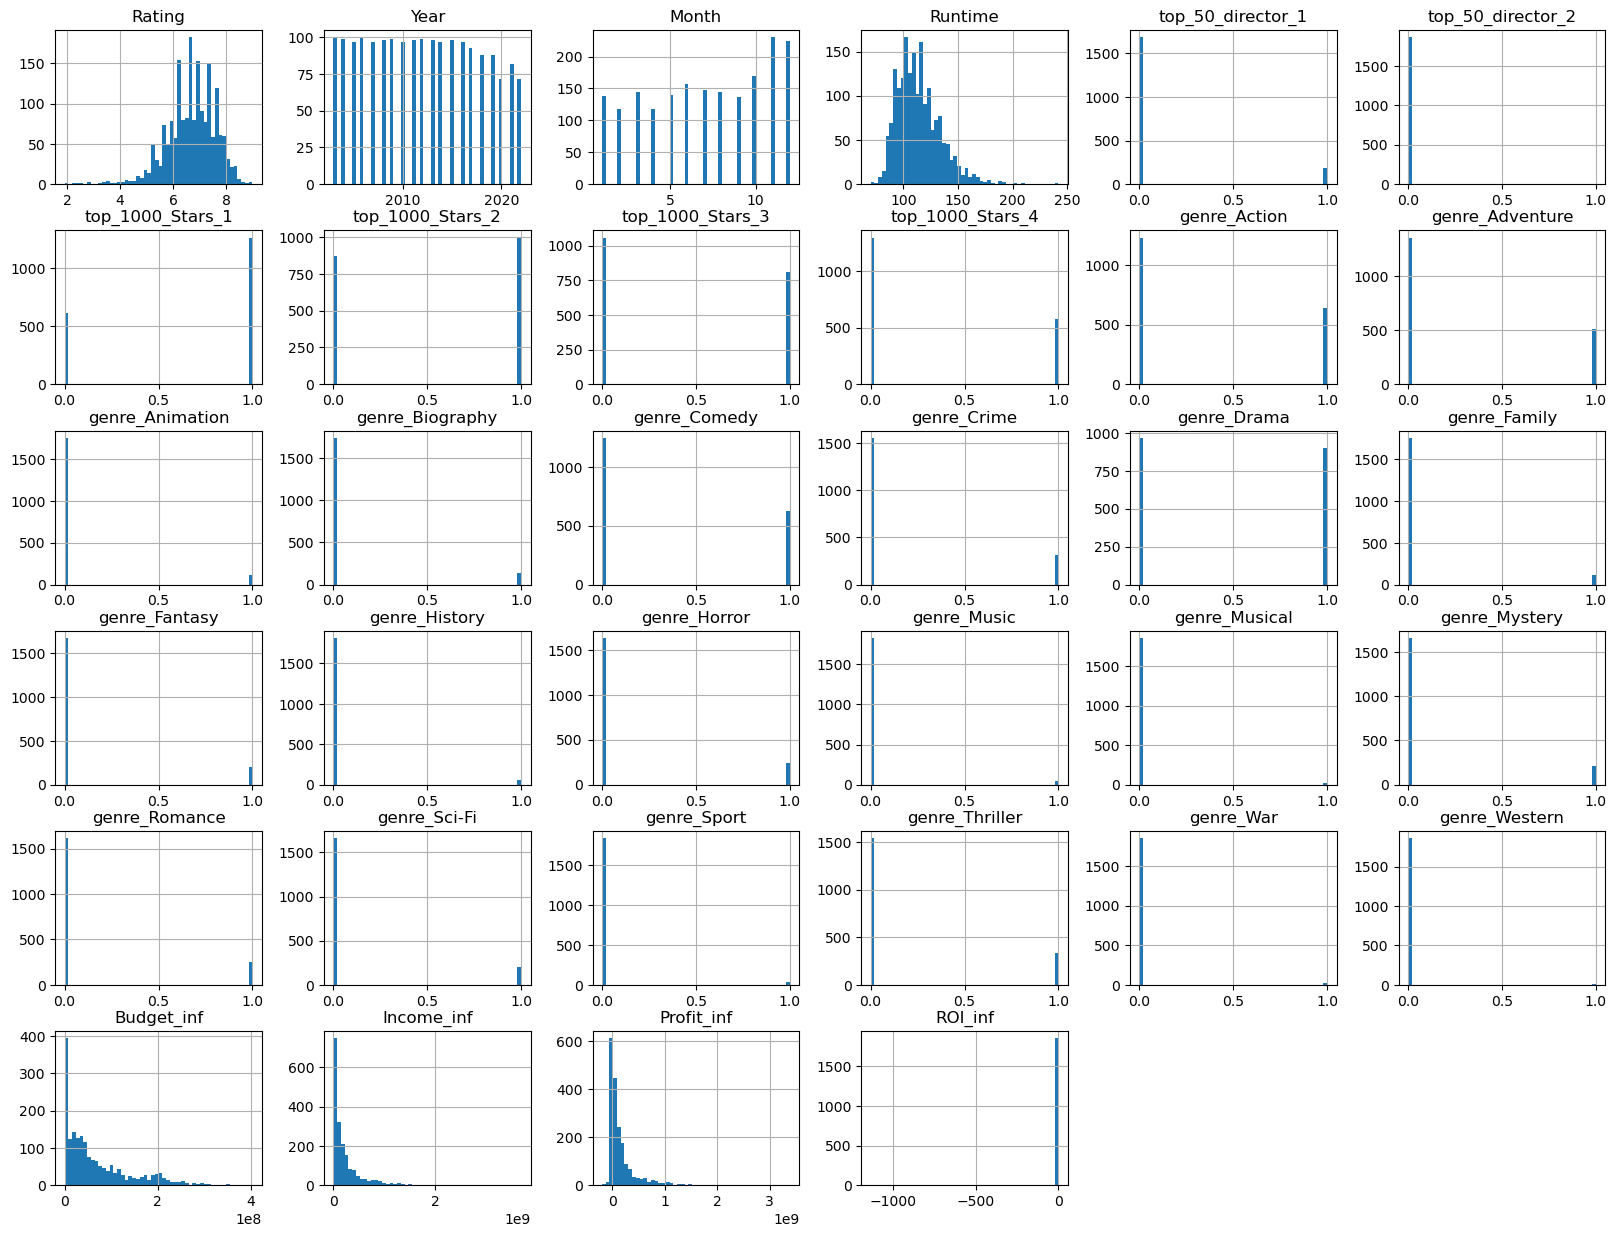

In [8]:
%matplotlib inline 
df.hist(bins=50, figsize=(20,15)) 
plt.show()


Class imbalance is typically a more significant problem when one class is much smaller than the other, such as a 1:10 or 1:100 ratio. In these cases, the smaller class may be underrepresented in the training data, which can lead to poor performance on predicting that class.(GPT)

As seen in distribution overall in df, some genres class difference reaches far out than 1:3 or 1:10 even. There we can say its very unbalanced and model may not perform well in those cases. 

<AxesSubplot:>

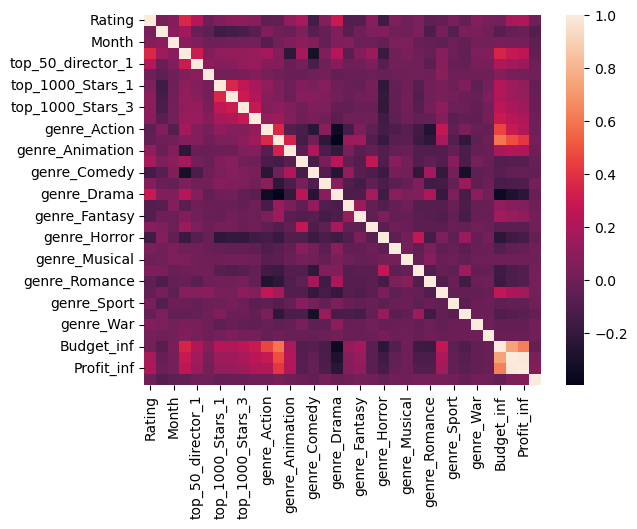

In [9]:
sns.heatmap(df.corr())

df.sort_values(by=()[])

In [ ]:
#Income_inf, Budget_inf, ROI_inf


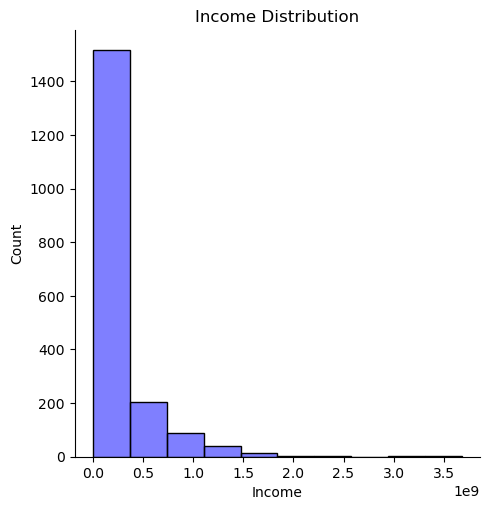

In [11]:
# Plot the distribution of varians for [Income_inf]
sns.displot(x=df['Income_inf'], bins= 10, color='blue', alpha= 0.5)

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


In [12]:
#Calculating class distribution

class_dist = df['Income_inf'].value_counts(normalize=True)

In [13]:
print(class_dist)

0.000000e+00    0.021402
2.267947e+09    0.000535
2.343011e+08    0.000535
7.848070e+07    0.000535
2.069515e+07    0.000535
                  ...   
6.372145e+06    0.000535
4.379026e+05    0.000535
1.894077e+08    0.000535
6.750951e+07    0.000535
8.237690e+07    0.000535
Name: Income_inf, Length: 1830, dtype: float64


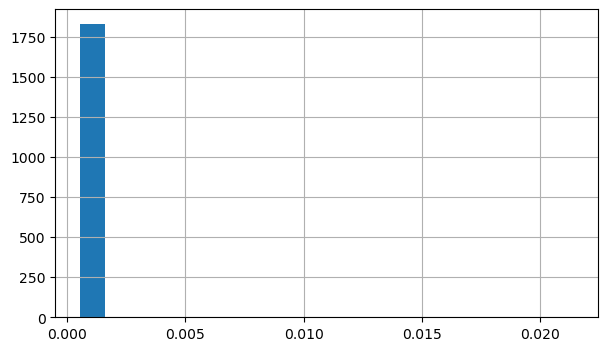

In [14]:
class_dist.hist(bins=20, figsize=(7,4)) 
plt.show()

In [15]:
count_bud = (df['Budget_inf'] > 10**6).sum()

count_inc = (df['Income_inf'] > 10**6).sum()

count_rating = (df['Rating'] > 7).sum()

In [16]:
print(count_bud)
print(count_inc)
print(count_rating)

1645
1758
702


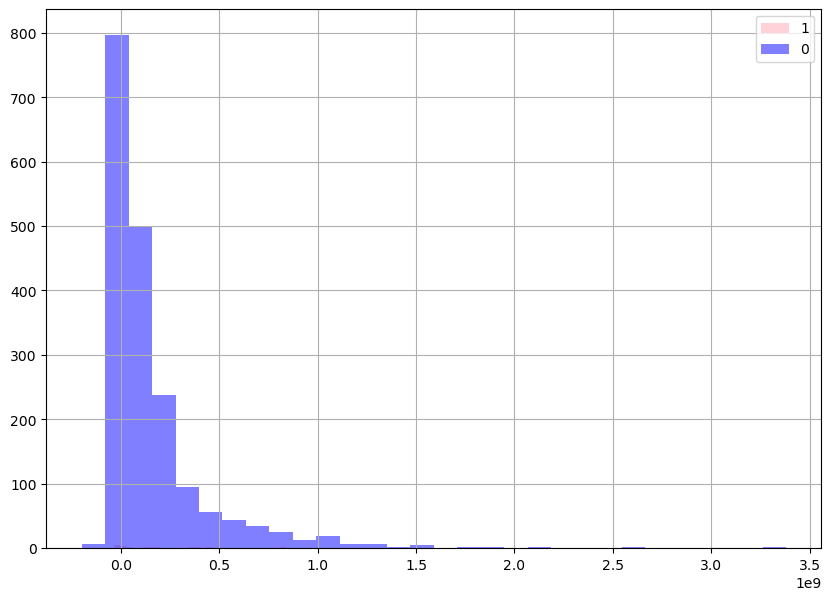

In [17]:
df[df['genre_Musical']==1]['Profit_inf'].hist(bins=30, figsize=(10,7), color='pink', alpha=0.7)
df[df['genre_Musical']==0]['Profit_inf'].hist(bins=30, figsize=(10,7), color='blue', alpha=0.5)

plt.legend([1, 0])

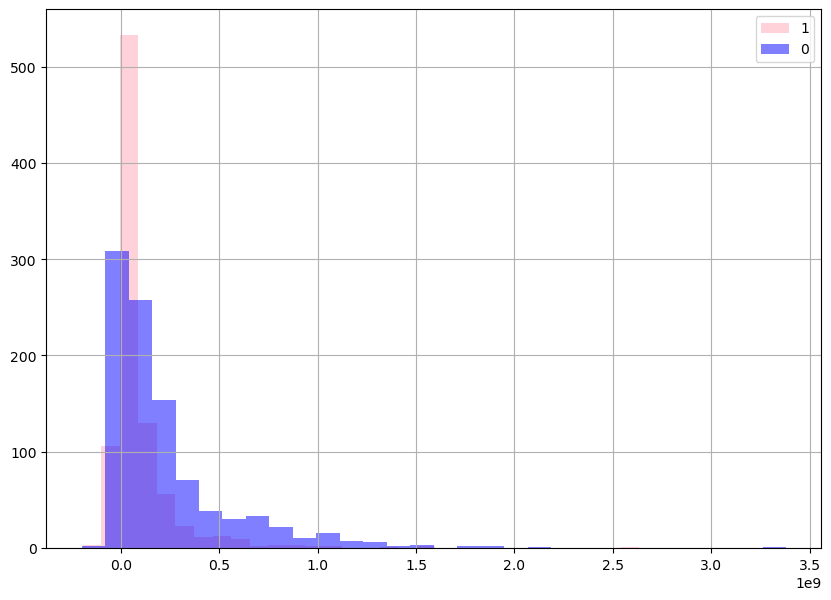

In [18]:
df[df['genre_Drama']==1]['Profit_inf'].hist(bins=30, figsize=(10,7), color='pink', alpha=0.7)
df[df['genre_Drama']==0]['Profit_inf'].hist(bins=30, figsize=(10,7), color='blue', alpha=0.5)

plt.legend([1,0])

In [24]:
# we need to drop all non-numeric column sfor models to run. Certficate and Title column are not needed. 
df = df.drop(['Directors', 'Stars', 'Country_of_origin'], axis =1)

In [25]:
#double checking columns as objet type in dataset 
string_columns = df.select_dtypes(include='object').columns
print(string_columns)

Index([], dtype='object')


In [31]:
df.isna().sum()

Rating               0
Year                 0
Month                0
Runtime              0
top_50_director_1    0
top_50_director_2    0
top_1000_Stars_1     0
top_1000_Stars_2     0
top_1000_Stars_3     0
top_1000_Stars_4     0
genre_Action         0
genre_Adventure      0
genre_Animation      0
genre_Biography      0
genre_Comedy         0
genre_Crime          0
genre_Drama          0
genre_Family         0
genre_Fantasy        0
genre_History        0
genre_Horror         0
genre_Music          0
genre_Musical        0
genre_Mystery        0
genre_Romance        0
genre_Sci-Fi         0
genre_Sport          0
genre_Thriller       0
genre_War            0
genre_Western        0
Budget_inf           0
Income_inf           0
Profit_inf           0
ROI_inf              0
dtype: int64

### 1. Linear Regression

In [26]:
# assuming your dataframe is named 'df' and our column we want to predict is 'Rating' column
X = df.drop('Rating', axis=1)
y = df['Rating']

In [27]:
# Splitting the df to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# scaling w RobustScaler object and fit to training data
scaler = RobustScaler()

scaler.fit(X_train)

RobustScaler()

In [32]:
# apply the scaler to both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
y_pred =lr.predict(X_test_scaled)

In [36]:
#checking mse as performance metric

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.5743745676433462


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
#RMSE
RMSE = np.sqrt(mse)
print(RMSE)

0.7578750343185519


In [42]:
# evaluate the model performance using mean absolute error and mean squared error and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)

Mean absolute error: 0.5514891244425162
Mean squared error: 0.5743745676433462
Root mean squared error: 0.7578750343185519


## 2.Logistic regression

In [ ]:
# When running ML models i.e Logistic regression, svm , random forest and decision trees // model may benefit from stratifying 

In [61]:
# As for LogReg model to run, we need to put the data in to categories again such as binary (0, 1)
# for Rating column data its needed. 
df['rating_bins'] = pd.cut(df['Rating'], bins=10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Split the data into features and target
X = df.drop(['Rating', 'rating_bins'], axis=1)
y = df['rating_bins']

In [65]:
# scale the data using RobustScaler for Logreg
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [63]:
#Train the logreg model
logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
# evaluate the logistic regression model on the test set
logreg_score = logreg.score(X_test_scaled, y_test)
print("LogReg Accuracy:", logreg_score)

In [ ]:
# break to Logreg and continues with SVM 

### 3. SVM 

In [67]:
#Scaling the data for SVM model
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
#fitting the training data for SVM model
svm = SVC(kernel ='linear')
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [74]:
y_pred = svm.predict(X_test_scaled)

In [75]:
accuracy = accuracy_score(y_test, y_pred)

In [76]:
print(accuracy)

0.4197860962566845


In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  4  1  0  0]
 [ 0  0  0  0  0 10  4  0  0]
 [ 0  0  0  0  0 42 16  1  0]
 [ 0  0  0  0  0 87 30  7  0]
 [ 0  0  0  0  0 38 60  7  0]
 [ 0  0  0  0  0  9 37 10  0]
 [ 0  0  0  0  0  0  1  6  0]]


In [80]:
# calculate precision and recall
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision:", precision)
print("Recall:", recall)

Precision: nan
Recall: nan


/var/folders/m7/9cltlp9x46vd9s1599v_nw3m0000gn/T/ipykernel_2150/3216956901.py:5: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)
/var/folders/m7/9cltlp9x46vd9s1599v_nw3m0000gn/T/ipykernel_2150/3216956901.py:6: RuntimeWarning: invalid value encountered in long_scalars
  recall = TP / (TP + FN)


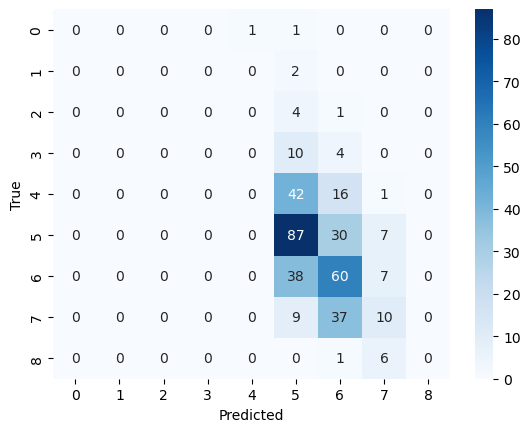

In [81]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
---

### 4. K -nearest Neighbors

### 5. Random forest / Decision trees

### 6. Neural networks